# Tasks for laboratory assignment 3

In [1]:
# Imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    r2_score,
)

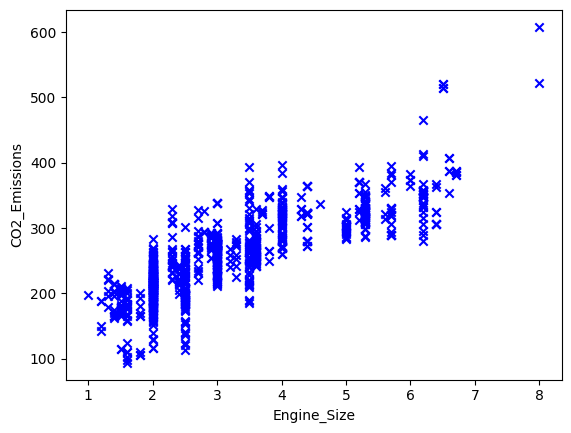

In [2]:
def build_plot(file_path: str, x: int, y: int):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c="blue", marker="x")
    plt.xlabel(x)
    plt.ylabel(y)
    return plt


build_plot("resources/CO2_emission.csv", "Engine_Size", "CO2_Emissions").show()

In [3]:
def extract_texts_from_file(file_path: str) -> pd.DataFrame:
    data = pd.read_csv(file_path)
    return data


data = extract_texts_from_file("resources/heart.csv")
print(data[:50])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

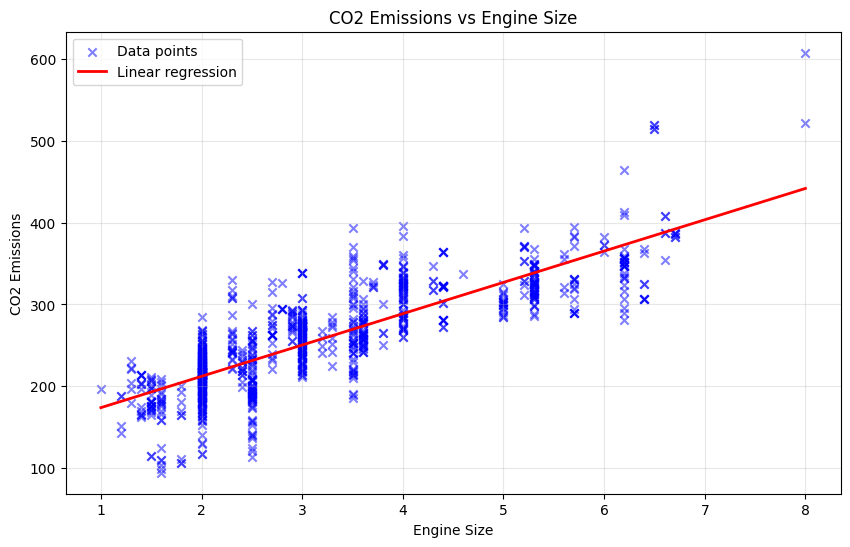

Model parameters: intercept = 135.3261, coefficient = 38.3230


In [4]:
def CO2_emissions(data: pd.DataFrame):
    # Extract features and target
    X = data[["Engine_Size"]].values
    y = data["CO2_Emissions"].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate predictions for plotting
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_line)

    # Visualize the model
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color="blue", alpha=0.5, label="Data points", marker="x")
    plt.plot(X_line, y_pred, color="red", linewidth=2, label="Linear regression")
    plt.xlabel("Engine Size")
    plt.ylabel("CO2 Emissions")
    plt.title("CO2 Emissions vs Engine Size")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Return model parameters (theta values)
    # For linear regression: [intercept, coefficient]
    return [model.intercept_, model.coef_[0]]


data = extract_texts_from_file("resources/CO2_emission.csv")
theta = CO2_emissions(data)
print(f"Model parameters: intercept = {theta[0]:.4f}, coefficient = {theta[1]:.4f}")

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

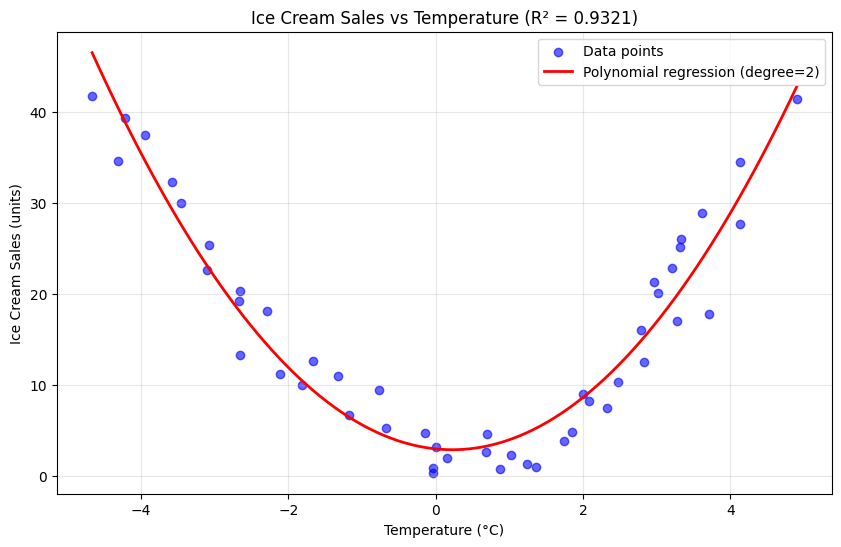

Model parameters (Polynomial degree 2):
  Intercept: 2.9518
  Coefficient for x: -0.8247
  Coefficient for x²: 1.8295


In [5]:
def ice_cream_selling(data: pd.DataFrame):
    # Extract features and target
    X = data[["Temperature (°C)"]].values
    y = data["Ice Cream Sales (units)"].values

    # The data shows a non-linear pattern - use Polynomial Regression
    # Quadratic regression works well for U-shaped or curved data
    degree = 2

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate predictions for plotting
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_line_poly = poly.transform(X_line)
    y_pred = model.predict(X_line_poly)

    # Calculate R-squared score
    y_train_pred = model.predict(X_poly)
    ss_res = np.sum((y - y_train_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Visualize the model
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color="blue", alpha=0.6, label="Data points", marker="o")
    plt.plot(
        X_line,
        y_pred,
        color="red",
        linewidth=2,
        label=f"Polynomial regression (degree={degree})",
    )
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Ice Cream Sales (units)")
    plt.title(f"Ice Cream Sales vs Temperature (R² = {r_squared:.4f})")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Return model parameters (theta values)
    # For polynomial: [intercept, coef_x, coef_x^2]
    return [model.intercept_] + list(model.coef_[1:])


data = extract_texts_from_file("resources/ice_cream_selling_data.csv")
theta = ice_cream_selling(data)
print(f"Model parameters (Polynomial degree 2):")
print(f"  Intercept: {theta[0]:.4f}")
print(f"  Coefficient for x: {theta[1]:.4f}")
print(f"  Coefficient for x²: {theta[2]:.4f}")

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

POWER CONSUMPTION PREDICTION MODEL
Model: Random Forest Regressor (300 trees, max_depth=None)
Features: ['Temperature', 'Humidity', 'WindSpeed']
Target: Total Power Consumption (Zone1 + Zone2 + Zone3)

R² Score: 0.9285
RMSE: 4584.97

Feature Importances:
  Temperature: 0.5125
  Humidity: 0.3148
  WindSpeed: 0.1727


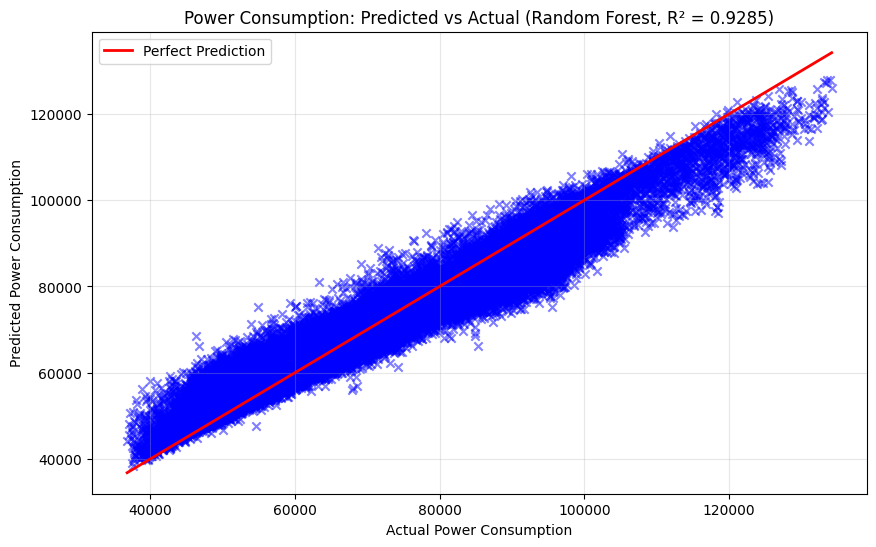


Feature importances: [0.5124618021051082, 0.3147927593343257, 0.17274543856056618]


In [6]:
def power_consumption(data: pd.DataFrame):
    # Extract features
    feature_cols = ["Temperature", "Humidity", "WindSpeed"]
    X = data[feature_cols].values

    # Use total power consumption from all zones as target
    y = (
        data["PowerConsumption_Zone1"].values
        + data["PowerConsumption_Zone2"].values
        + data["PowerConsumption_Zone3"].values
    )

    # Random Forest Regressor - best fitting model for this data
    # Random Forest handles non-linear relationships and feature interactions well
    model = RandomForestRegressor(
        n_estimators=300, max_depth=None, random_state=42, n_jobs=-1
    )
    model.fit(X, y)

    # Create predictions
    y_pred = model.predict(X)

    # Calculate R-squared score
    r_squared = r2_score(y, y_pred)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))

    print("=" * 50)
    print("POWER CONSUMPTION PREDICTION MODEL")
    print("=" * 50)
    print(f"Model: Random Forest Regressor (300 trees, max_depth=None)")
    print(f"Features: {feature_cols}")
    print(f"Target: Total Power Consumption (Zone1 + Zone2 + Zone3)")
    print(f"\nR² Score: {r_squared:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"\nFeature Importances:")
    for feat, imp in zip(feature_cols, model.feature_importances_):
        print(f"  {feat}: {imp:.4f}")

    # Visualize the model
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5, c="blue", marker="x")
    plt.plot(
        [y.min(), y.max()],
        [y.min(), y.max()],
        "r-",
        linewidth=2,
        label="Perfect Prediction",
    )
    plt.xlabel("Actual Power Consumption")
    plt.ylabel("Predicted Power Consumption")
    plt.title(
        f"Power Consumption: Predicted vs Actual (Random Forest, R² = {r_squared:.4f})"
    )
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Return feature importances
    return model.feature_importances_.tolist()


data = extract_texts_from_file("resources/powerconsumption.csv")
feature_importances = power_consumption(data)
print(f"\nFeature importances: {feature_importances}")

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

HEART ATTACK RISK CLASSIFICATION

Training Accuracy: 0.8636
Validation Accuracy: 0.8525

Classification Report (Validation Set):
              precision    recall  f1-score   support

    Low Risk       0.83      0.86      0.85        29
   High Risk       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



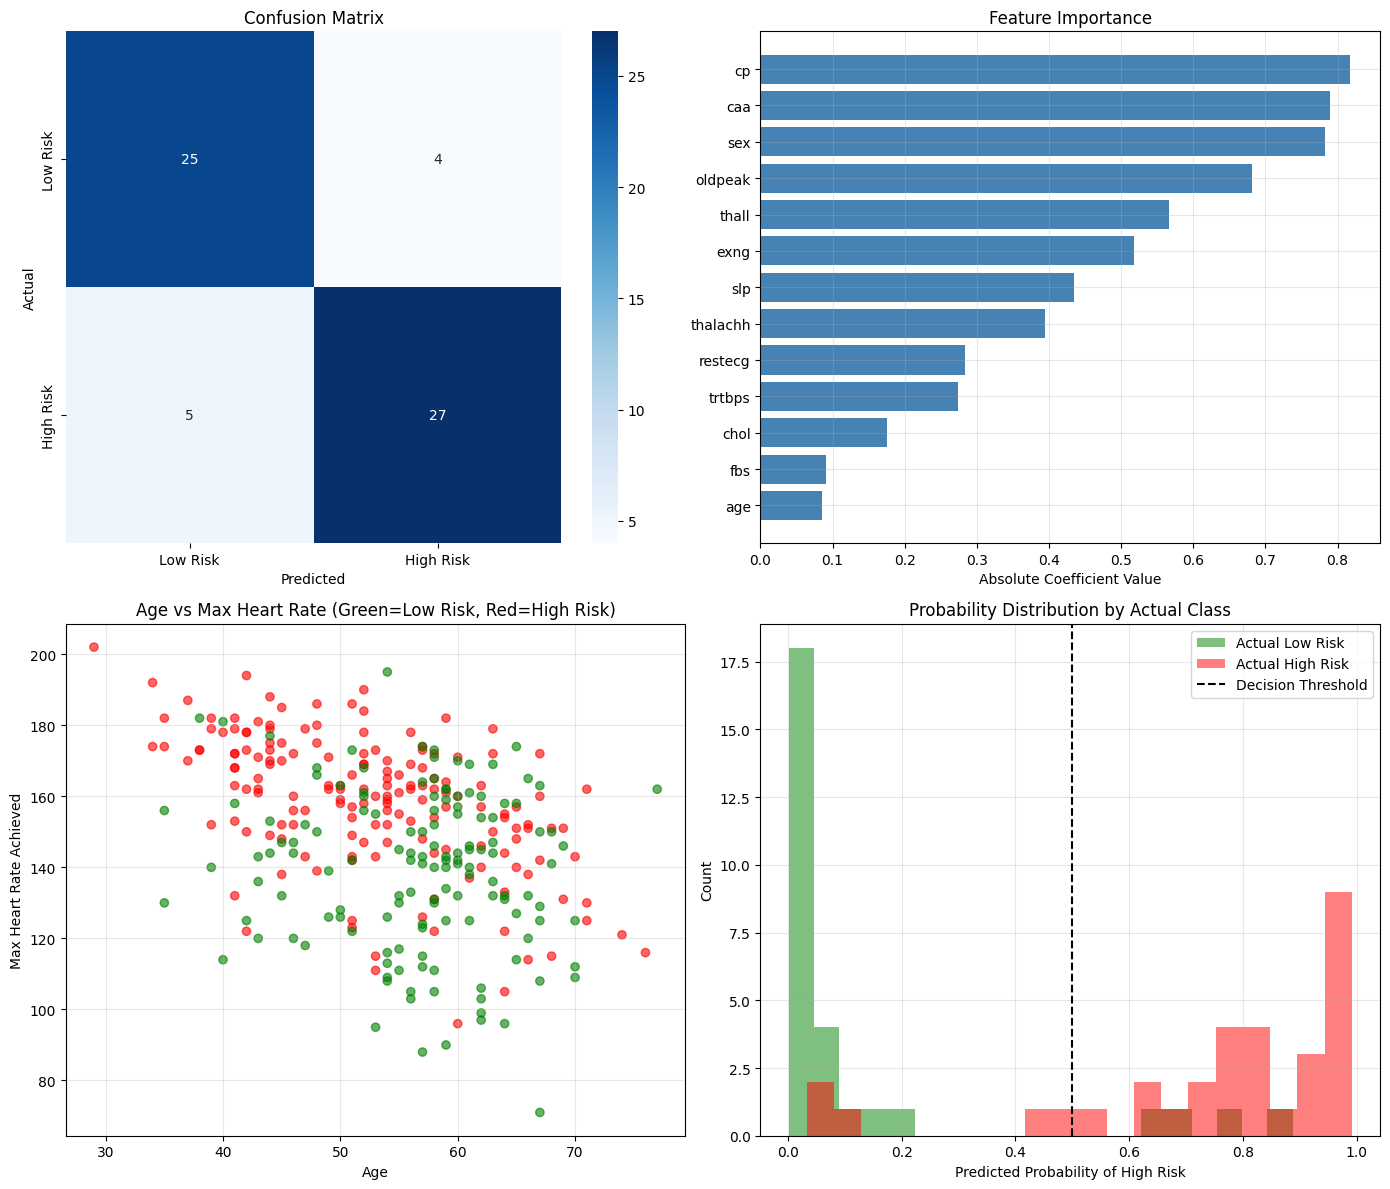


Model Intercept: 0.1789


In [7]:
def heart_classification(data: pd.DataFrame):
    # Select features for classification
    feature_cols = [
        "age",
        "sex",
        "cp",
        "trtbps",
        "chol",
        "fbs",
        "restecg",
        "thalachh",
        "exng",
        "oldpeak",
        "slp",
        "caa",
        "thall",
    ]
    X = data[feature_cols].values
    y = data["output"].values

    # Split data into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit Logistic Regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("=" * 50)
    print("HEART ATTACK RISK CLASSIFICATION")
    print("=" * 50)
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {test_accuracy:.4f}")
    print("\nClassification Report (Validation Set):")
    print(
        classification_report(
            y_test, y_test_pred, target_names=["Low Risk", "High Risk"]
        )
    )

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Plot 1: Confusion Matrix
    ax1 = axes[0, 0]
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=ax1,
        xticklabels=["Low Risk", "High Risk"],
        yticklabels=["Low Risk", "High Risk"],
    )
    ax1.set_xlabel("Predicted")
    ax1.set_ylabel("Actual")
    ax1.set_title("Confusion Matrix")

    # Plot 2: Feature Importance
    ax2 = axes[0, 1]
    feature_importance = pd.DataFrame(
        {"feature": feature_cols, "importance": np.abs(model.coef_[0])}
    ).sort_values("importance", ascending=True)
    ax2.barh(
        feature_importance["feature"],
        feature_importance["importance"],
        color="steelblue",
    )
    ax2.set_xlabel("Absolute Coefficient Value")
    ax2.set_title("Feature Importance")
    ax2.grid(True, alpha=0.3)

    # Plot 3: Age vs Max Heart Rate colored by risk
    ax3 = axes[1, 0]
    colors = ["green" if o == 0 else "red" for o in data["output"]]
    ax3.scatter(data["age"], data["thalachh"], c=colors, alpha=0.6)
    ax3.set_xlabel("Age")
    ax3.set_ylabel("Max Heart Rate Achieved")
    ax3.set_title("Age vs Max Heart Rate (Green=Low Risk, Red=High Risk)")
    ax3.grid(True, alpha=0.3)

    # Plot 4: Distribution of predictions
    ax4 = axes[1, 1]
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    ax4.hist(
        y_prob[y_test == 0], bins=20, alpha=0.5, label="Actual Low Risk", color="green"
    )
    ax4.hist(
        y_prob[y_test == 1], bins=20, alpha=0.5, label="Actual High Risk", color="red"
    )
    ax4.axvline(x=0.5, color="black", linestyle="--", label="Decision Threshold")
    ax4.set_xlabel("Predicted Probability of High Risk")
    ax4.set_ylabel("Count")
    ax4.set_title("Probability Distribution by Actual Class")
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "coefficients": model.coef_[0].tolist(),
        "intercept": model.intercept_[0],
    }


data = extract_texts_from_file("resources/heart.csv")
results = heart_classification(data)
print(f"\nModel Intercept: {results['intercept']:.4f}")

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at them. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.

DRUG CLASSIFICATION ANALYSIS

Dataset shape: (200, 6)

Drug distribution:
drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

Training Accuracy: 0.9437
Validation Accuracy: 0.9250

Classification Report (Validation Set):
              precision    recall  f1-score   support

       drugA       0.86      1.00      0.92         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.60      0.75         5
       drugX       0.85      1.00      0.92        11
       drugY       1.00      0.93      0.97        15

    accuracy                           0.93        40
   macro avg       0.94      0.91      0.91        40
weighted avg       0.94      0.93      0.92        40



c:\Users\User\Desktop\assignment-3-ml-algorithms-kvpmx\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


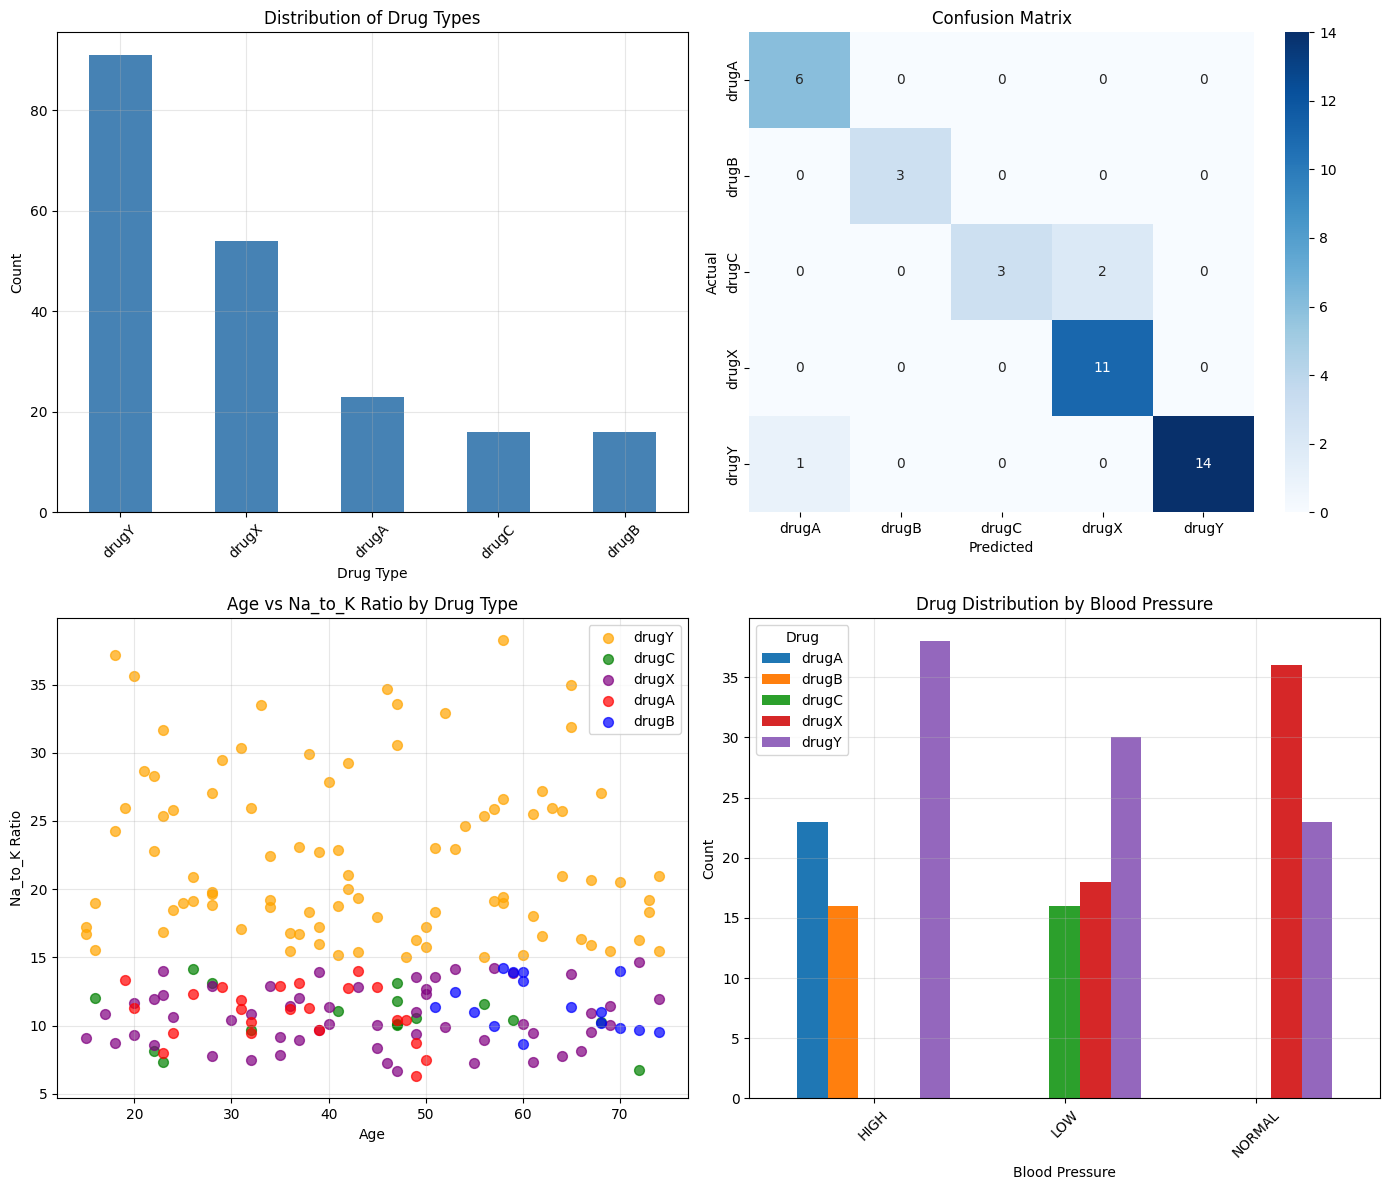


Model Results: {'model_type': 'LogisticRegression (multinomial)', 'train_accuracy': 0.94375, 'test_accuracy': 0.925, 'classes': ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']}


In [8]:
def drug_classification_analysis(data: pd.DataFrame):
    print("=" * 50)
    print("DRUG CLASSIFICATION ANALYSIS")
    print("=" * 50)

    # Data exploration
    print(f"\nDataset shape: {data.shape}")
    print("\nDrug distribution:")
    print(data["drug"].value_counts())

    # Prepare features - convert categorical variables to numeric
    data_encoded = data.copy()
    data_encoded["sex"] = data_encoded["sex"].map({"M": 1, "F": 0})
    data_encoded["bp"] = data_encoded["bp"].map({"HIGH": 2, "NORMAL": 1, "LOW": 0})
    data_encoded["cholesterol"] = data_encoded["cholesterol"].map(
        {"HIGH": 1, "NORMAL": 0}
    )

    # Features and target
    feature_cols = ["age", "sex", "bp", "cholesterol", "Na_to_K"]
    X = data_encoded[feature_cols].values
    y = data_encoded["drug"].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build classification model using Logistic Regression (multiclass)
    model = LogisticRegression(
        random_state=42, max_iter=1000, multi_class="multinomial"
    )
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    print(f"\nTraining Accuracy: {model.score(X_train_scaled, y_train):.4f}")
    print(f"Validation Accuracy: {model.score(X_test_scaled, y_test):.4f}")
    print("\nClassification Report (Validation Set):")
    print(classification_report(y_test, y_pred))

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Plot 1: Drug distribution
    ax1 = axes[0, 0]
    data["drug"].value_counts().plot(kind="bar", ax=ax1, color="steelblue")
    ax1.set_title("Distribution of Drug Types")
    ax1.set_xlabel("Drug Type")
    ax1.set_ylabel("Count")
    ax1.tick_params(axis="x", rotation=45)
    ax1.grid(True, alpha=0.3)

    # Plot 2: Confusion Matrix
    ax2 = axes[0, 1]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=ax2,
        xticklabels=model.classes_,
        yticklabels=model.classes_,
    )
    ax2.set_xlabel("Predicted")
    ax2.set_ylabel("Actual")
    ax2.set_title("Confusion Matrix")

    # Plot 3: Age vs Na_to_K colored by drug type
    ax3 = axes[1, 0]
    colors = {
        "drugA": "red",
        "drugB": "blue",
        "drugC": "green",
        "drugX": "purple",
        "drugY": "orange",
    }
    for drug in data["drug"].unique():
        subset = data[data["drug"] == drug]
        ax3.scatter(
            subset["age"],
            subset["Na_to_K"],
            label=drug,
            alpha=0.7,
            s=50,
            color=colors.get(drug, "gray"),
        )
    ax3.set_xlabel("Age")
    ax3.set_ylabel("Na_to_K Ratio")
    ax3.set_title("Age vs Na_to_K Ratio by Drug Type")
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Blood Pressure distribution by drug
    ax4 = axes[1, 1]
    bp_drug = data.groupby(["bp", "drug"]).size().unstack(fill_value=0)
    bp_drug.plot(kind="bar", ax=ax4, width=0.8)
    ax4.set_xlabel("Blood Pressure")
    ax4.set_ylabel("Count")
    ax4.set_title("Drug Distribution by Blood Pressure")
    ax4.tick_params(axis="x", rotation=45)
    ax4.legend(title="Drug")
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return {
        "model_type": "LogisticRegression (multinomial)",
        "train_accuracy": model.score(X_train_scaled, y_train),
        "test_accuracy": model.score(X_test_scaled, y_test),
        "classes": model.classes_.tolist(),
    }


# Load and analyze drug data
drug_data = extract_texts_from_file("resources/drug.csv")
drug_results = drug_classification_analysis(drug_data)
print(f"\nModel Results: {drug_results}")